##**Dataset**

In [ ]:
file1 = open('/content/drive/MyDrive/deep_learning_hws/HWs/4/ferdousi.txt', 'r')
Lines = file1.readlines()

In [ ]:
inputs=[]
outputs=[]
for i in range(2,len(Lines)-1,2):
  inputs.append(Lines[i].strip('\n'))
  outputs.append(Lines[i+1].strip('\n'))

In [ ]:
inputs[0]

'به نام خداوند جان و خرد'

In [ ]:
outputs[0]

'کزین برتر اندیشه برنگذرد'

In [ ]:
import os, sys

from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 8
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = 20000
MAX_SENTENCE_LENGTH = 50
MAX_NUM_WORDS = 20000
EMBEDDING_SIZE = 100

In [ ]:
input_sentences=[]
output_sentences=[]
output_sentences_inputs = []
count = 0
for i in range(2,len(Lines)-1,2):
  input_sentence = Lines[i].strip('\n')
  output = Lines[i+1].strip('\n')
  count += 1

  if count > NUM_SENTENCES:
    break

  output_sentence = output + ' <eos>'
  output_sentence_input = '<sos> ' + output

  input_sentences.append(input_sentence)
  output_sentences.append(output_sentence)
  output_sentences_inputs.append(output_sentence_input)

print("num samples input:", len(input_sentences))
print("num samples output:", len(output_sentences))
print("num samples output input:", len(output_sentences_inputs))

num samples input: 20000
num samples output: 20000
num samples output input: 20000


In [ ]:
print(input_sentences[172])
print(output_sentences[172])
print(output_sentences_inputs[172])

دریغ آن کمربند و آن گردگاه
دریغ آن کیی برز و بالای شاه <eos>
<sos> دریغ آن کیی برز و بالای شاه


In [ ]:
input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)

word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

num_words_input = len(word2idx_inputs) + 1
max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)

Total unique words in the input: 7396
Length of longest sentence in input: 11


In [ ]:
output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

Total unique words in the output: 7922
Length of longest sentence in the output: 12


In [ ]:
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[172]:", encoder_input_sequences[172])

encoder_input_sequences.shape: (20000, 11)
encoder_input_sequences[172]: [   0    0    0    0    0  810   21  844    1   21 4319]


In [ ]:
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[172]:", decoder_input_sequences[172])

decoder_input_sequences.shape: (20000, 12)
decoder_input_sequences[172]: [   2 1007   27 1786  703    3  586   28    0    0    0    0]


In [ ]:
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_output_sequences.shape)
print("decoder_input_sequences[172]:", decoder_output_sequences[172])

decoder_input_sequences.shape: (20000, 12)
decoder_input_sequences[172]: [1007   27 1786  703    3  586   28    1    0    0    0    0]


In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fasttext
import fasttext.util
fasttext.util.download_model('fa', if_exists='ignore')  # Persian

'cc.fa.300.bin'

In [ ]:
ft = fasttext.load_model('cc.fa.300.bin')
ft.get_dimension()
fasttext.util.reduce_model(ft, 100)
ft.get_dimension()

100

In [ ]:
!rm -r /content/cc.fa.300.bin.gz

rm: cannot remove '/content/cc.fa.300.bin.gz': No such file or directory


In [ ]:
num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_SIZE))
for word, index in word2idx_inputs.items():
    embedding_vector = ft.get_word_vector(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
print(embedding_matrix[539])

[-0.1557155   0.00252043  0.10223792  0.07381915 -0.08709624  0.19270158
 -0.09906357 -0.06595844 -0.049062   -0.04832852 -0.12825242  0.06963368
  0.08702582  0.05197926 -0.03041364 -0.03755385 -0.02755375  0.06748731
 -0.03004631 -0.0670621   0.08433469 -0.02011502 -0.02465971  0.07285171
 -0.11777939  0.04727184 -0.04733373 -0.02902734 -0.07392121  0.10239594
  0.06023012 -0.03176318  0.05785254  0.0049776   0.03579669  0.04224243
 -0.02525595  0.06847513 -0.00893902  0.09192023 -0.09349605  0.01060967
  0.01171269 -0.0288957   0.05119859  0.06175212  0.07594294  0.04438259
  0.02903671 -0.00453236 -0.05587432  0.00580842  0.01893761  0.0249174
  0.04737693 -0.00217094  0.07116451 -0.02416988 -0.06583928  0.03848156
 -0.02577743 -0.03372969  0.03457469  0.00094749  0.05096736 -0.01395384
 -0.06325597 -0.02920677  0.00218947 -0.01312318 -0.02231554 -0.00939316
 -0.00921615 -0.02176376  0.01757556  0.01764314  0.0126503  -0.03228202
  0.02327092  0.00295267 -0.02351361 -0.02224538  0.

In [ ]:
embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)

In [ ]:
decoder_targets_one_hot = np.zeros((
        len(input_sentences),
        max_out_len,
        num_words_output
    ),
    dtype='float32'
)

In [ ]:
decoder_targets_one_hot.shape

(20000, 12, 7923)

In [ ]:
for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

##  **LSTM**

In [ ]:
encoder_inputs_placeholder = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs_placeholder)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [ ]:
decoder_inputs_placeholder = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [ ]:
decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
model = Model([encoder_inputs_placeholder,
  decoder_inputs_placeholder], decoder_outputs)
model.compile(
    optimizer='adam',   #rmsprop
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

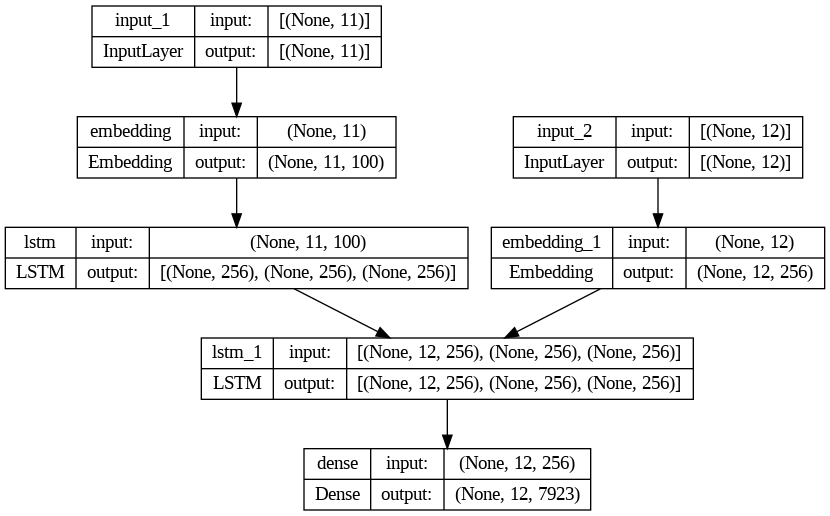

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = '/content/drive/MyDrive/deep_learning_hws/HWs/4/P1/my_best_lstm_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", mode="min",
	save_best_only=True, verbose=1)
callbacks = [checkpoint]

In [ ]:
r = model.fit(
    [encoder_input_sequences, decoder_input_sequences],
    decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/20

Epoch 1: val_loss improved from inf to 3.04285, saving model to /content/drive/MyDrive/deep_learning_hws/HWs/4/P1/my_best_lstm_model.epoch01-loss3.04.hdf5
2250/2250 - 27s - loss: 3.3156 - accuracy: 0.5450 - val_loss: 3.0429 - val_accuracy: 0.5714 - 27s/epoch - 12ms/step
Epoch 2/20

Epoch 2: val_loss improved from 3.04285 to 2.89997, saving model to /content/drive/MyDrive/deep_learning_hws/HWs/4/P1/my_best_lstm_model.epoch02-loss2.90.hdf5
2250/2250 - 17s - loss: 2.9062 - accuracy: 0.5646 - val_loss: 2.9000 - val_accuracy: 0.5844 - 17s/epoch - 8ms/step
Epoch 3/20

Epoch 3: val_loss improved from 2.89997 to 2.83622, saving model to /content/drive/MyDrive/deep_learning_hws/HWs/4/P1/my_best_lstm_model.epoch03-loss2.84.hdf5
2250/2250 - 17s - loss: 2.6674 - accuracy: 0.5794 - val_loss: 2.8362 - val_accuracy: 0.5899 - 17s/epoch - 8ms/step
Epoch 4/20

Epoch 4: val_loss improved from 2.83622 to 2.80707, saving model to /content/drive/MyDrive/deep_learning_hws/HWs/4/P1/my_best_lstm_mo

#### plot losse and accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


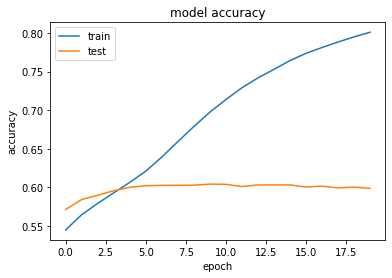

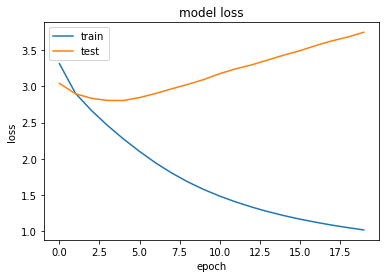

In [ ]:
print(r.history.keys())
# summarize history for accuracy
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Prediction

In [ ]:
encoder_model = Model(encoder_inputs_placeholder, encoder_states)

In [ ]:
decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_state_input_c = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

In [ ]:
decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

In [ ]:
decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)

In [ ]:
decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

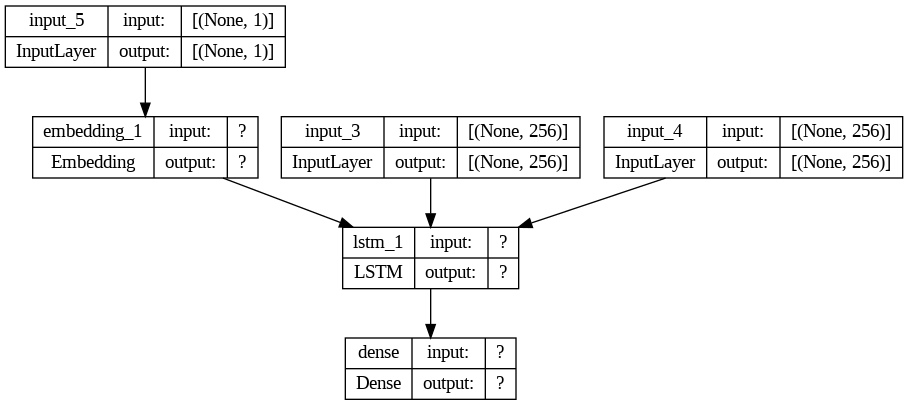

In [ ]:
from keras.utils import plot_model
plot_model(decoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)

In [ ]:
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [ ]:
def translate_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    eos = word2idx_outputs['<eos>']
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [ ]:
i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
translation = translate_sentence(input_seq)
print('-')
print('Input:', input_sentences[i])
print('Response:', translation)

1/1 [==============================] - 0s 15ms/step
-
Input: بپیش سپه بود پولادوند
Response: که با لشکر آیند چون چند جست


##  **GRU**

In [ ]:
encoder_inputs_placeholder = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs_placeholder)
# encoder = LSTM(LSTM_NODES, return_state=True)
encoder = GRU(LSTM_NODES, return_state=True)

encoder_outputs, h = encoder(x)
encoder_states = h

In [ ]:
decoder_inputs_placeholder = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

decoder_gru = GRU(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _ = decoder_gru(decoder_inputs_x, initial_state=encoder_states)

In [ ]:
decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
model = Model([encoder_inputs_placeholder,
  decoder_inputs_placeholder], decoder_outputs)
model.compile(
    optimizer='adam',   #rmsprop
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

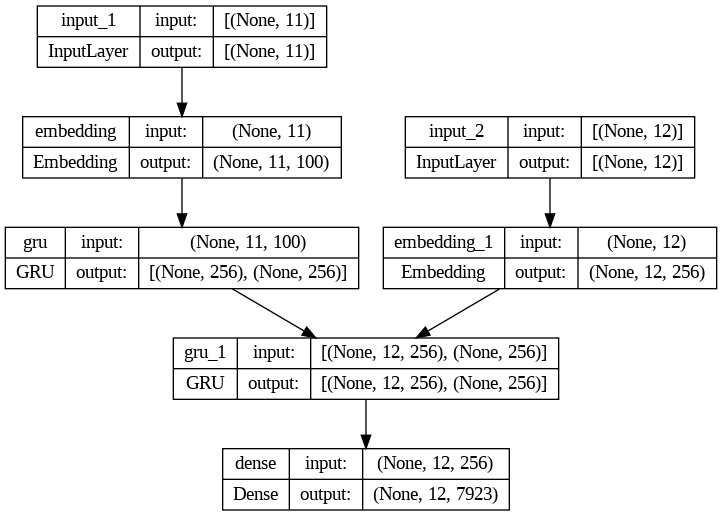

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4b.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = '/content/drive/MyDrive/deep_learning_hws/HWs/4/P1/my_best_gru_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", mode="min",
	save_best_only=True, verbose=1)
callbacks = [checkpoint]

In [ ]:
g = model.fit(
    [encoder_input_sequences, decoder_input_sequences],
    decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/20

Epoch 1: val_loss improved from inf to 2.94004, saving model to /content/drive/MyDrive/deep_learning_hws/HWs/4/P1/my_best_gru_model.epoch01-loss2.94.hdf5
2250/2250 - 27s - loss: 3.2834 - accuracy: 0.5466 - val_loss: 2.9400 - val_accuracy: 0.5817 - 27s/epoch - 12ms/step
Epoch 2/20

Epoch 2: val_loss improved from 2.94004 to 2.64385, saving model to /content/drive/MyDrive/deep_learning_hws/HWs/4/P1/my_best_gru_model.epoch02-loss2.64.hdf5
2250/2250 - 17s - loss: 2.6726 - accuracy: 0.5880 - val_loss: 2.6438 - val_accuracy: 0.6060 - 17s/epoch - 8ms/step
Epoch 3/20

Epoch 3: val_loss improved from 2.64385 to 2.55709, saving model to /content/drive/MyDrive/deep_learning_hws/HWs/4/P1/my_best_gru_model.epoch03-loss2.56.hdf5
2250/2250 - 17s - loss: 2.2409 - accuracy: 0.6239 - val_loss: 2.5571 - val_accuracy: 0.6201 - 17s/epoch - 8ms/step
Epoch 4/20

Epoch 4: val_loss did not improve from 2.55709
2250/2250 - 17s - loss: 1.9032 - accuracy: 0.6551 - val_loss: 2.5595 - val_accuracy: 0.62

#### plot losse and accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


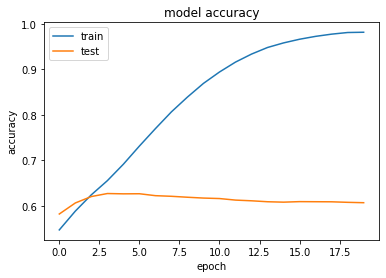

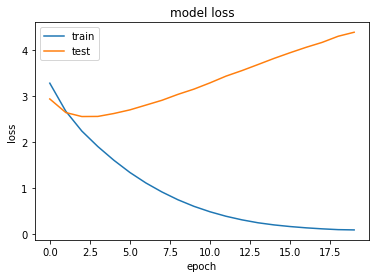

In [ ]:
print(g.history.keys())
# summarize history for accuracy
plt.plot(g.history['accuracy'])
plt.plot(g.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(g.history['loss'])
plt.plot(g.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Prediction

In [ ]:
encoder_model = Model(encoder_inputs_placeholder, encoder_states)

In [ ]:
decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h]

In [ ]:
decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

In [ ]:
decoder_outputs, h = decoder_gru(decoder_inputs_single_x, initial_state=decoder_states_inputs)

In [ ]:
decoder_states = [h]
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

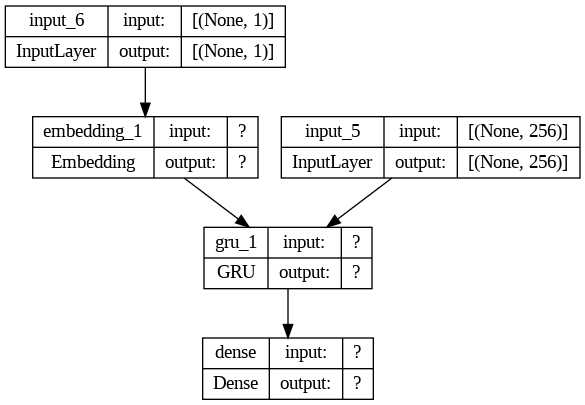

In [ ]:
from keras.utils import plot_model
plot_model(decoder_model, to_file='model_plot_gru_dec.png', show_shapes=True, show_layer_names=True)

In [ ]:
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [ ]:
def translate_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    eos = word2idx_outputs['<eos>']
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h]

    return ' '.join(output_sentence)

In [ ]:
i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
translation = translate_sentence(input_seq)
print('-')
print('Input:', input_sentences[i])
print('Response:', translation)